# `Model Validation`
---
1. Validation in deep learning
    - Commonly used validation is `split(Train and Test)` rather than `cross validation(K fold)`
    - Deep learning widely used `on large datasets`
    - Single validation score is based on large amount of data, and is `reliable`
    - Repeated training from cross-validation would take `long time`

## Exercise 1: Evaluating model accuracy on `validation dataset`

In [13]:
# Get data
import pandas as pd
from keras.utils import to_categorical
df = pd.read_csv("titanic_all_numeric_train.csv")
X_train = df.drop(['survived'], axis=1).values
y_train = to_categorical(df.survived)
df = pd.read_csv("titanic_all_numeric_test.csv")
X_test = df.drop(['survived'], axis=1).values

# Save the number of columns in predictors: n_fetures
n_fetures = X_train.shape[1]
input_shape = (n_fetures,)

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy'
              ,metrics=['accuracy'])
# Fit the model
hist = model.fit(X_train,
                 y_train, 
                 validation_split=0.3,
                epochs=10,verbose = 2)

Train on 623 samples, validate on 268 samples
Epoch 1/10
 - 1s - loss: 0.9258 - acc: 0.6228 - val_loss: 0.9234 - val_acc: 0.6455
Epoch 2/10
 - 0s - loss: 0.7041 - acc: 0.6421 - val_loss: 0.5463 - val_acc: 0.7276
Epoch 3/10
 - 0s - loss: 0.6659 - acc: 0.6517 - val_loss: 0.6496 - val_acc: 0.7239
Epoch 4/10
 - 0s - loss: 0.7605 - acc: 0.6806 - val_loss: 0.5486 - val_acc: 0.7351
Epoch 5/10
 - 0s - loss: 0.6049 - acc: 0.6806 - val_loss: 0.5969 - val_acc: 0.7500
Epoch 6/10
 - 0s - loss: 0.6362 - acc: 0.6854 - val_loss: 0.5491 - val_acc: 0.7500
Epoch 7/10
 - 0s - loss: 0.6095 - acc: 0.7063 - val_loss: 0.5336 - val_acc: 0.7799
Epoch 8/10
 - 0s - loss: 0.6931 - acc: 0.6886 - val_loss: 0.5068 - val_acc: 0.7425
Epoch 9/10
 - 0s - loss: 0.6125 - acc: 0.6934 - val_loss: 0.5036 - val_acc: 0.7948
Epoch 10/10
 - 0s - loss: 0.5787 - acc: 0.7014 - val_loss: 0.5622 - val_acc: 0.7948


In [16]:
#model.fit?

## Exercise 2: `Early stopping`, Optimizing the optimization

In [17]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

In [18]:
EarlyStopping?

Init signature:
EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)
Docstring:     
Stop training when a monitored quantity has stopped improving.

# Arguments
    monitor: quantity to be monitored.
    min_delta: minimum change in the monitored quantity
        to qualify as an improvement, i.e. an absolute
        change of less than min_delta, will count as no
        improvement.
    patience: number of epochs with no improvement
        after which training will be stopped.
    verbose: verbosity mode.
    mode: one of {auto, min, max}. In `min` mode,
        training will stop when the quantity
        monitored has stopped decreasing; in `max`
        mode it will stop when the quantity
        monitored has stopped increasing; in `auto`
        mode, the direction is automatically inferred
        from the name of the monitored quantity.
    baseline: Baseline value for the 

In [19]:
# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)
# Fit the model
model.fit(X_train, y_train, 
          epochs=30, 
          validation_split=0.2, 
          callbacks=[early_stopping_monitor],verbose=2)


Train on 712 samples, validate on 179 samples
Epoch 1/30
 - 2s - loss: 1.1015 - acc: 0.5871 - val_loss: 0.5960 - val_acc: 0.7263
Epoch 2/30
 - 0s - loss: 0.6529 - acc: 0.6896 - val_loss: 0.5624 - val_acc: 0.7821
Epoch 3/30
 - 0s - loss: 0.6022 - acc: 0.6910 - val_loss: 0.6070 - val_acc: 0.7151
Epoch 4/30
 - 0s - loss: 0.6397 - acc: 0.6756 - val_loss: 0.5543 - val_acc: 0.7207
Epoch 5/30
 - 0s - loss: 0.6286 - acc: 0.6798 - val_loss: 0.5726 - val_acc: 0.6704
Epoch 6/30
 - 0s - loss: 0.6702 - acc: 0.6657 - val_loss: 0.5506 - val_acc: 0.7542
Epoch 7/30
 - 0s - loss: 0.6475 - acc: 0.7051 - val_loss: 0.4764 - val_acc: 0.7430
Epoch 8/30
 - 0s - loss: 0.6957 - acc: 0.6868 - val_loss: 0.4851 - val_acc: 0.7709
Epoch 9/30
 - 0s - loss: 0.6205 - acc: 0.7191 - val_loss: 0.4485 - val_acc: 0.7709
Epoch 10/30
 - 0s - loss: 0.5675 - acc: 0.6952 - val_loss: 0.4558 - val_acc: 0.7765
Epoch 11/30
 - 0s - loss: 0.6015 - acc: 0.7163 - val_loss: 0.5479 - val_acc: 0.6983


## Exercise 3: Experimenting with `Wider Networks`

### Create a model with `Less Nodes(example 10 nodes)`

In [20]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)
# Create the new model: model_1
model_1 = Sequential()
# Add the first and second layers
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))
# Add the output layer
model_1.add(Dense(2, activation='softmax'))
# Compile model_1
model_1.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

### Create a model with `More Nodes(example 100 nodes)`

In [21]:
# Create the new model: model_2
model_2 = Sequential()
# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))
# Add the output layer
model_2.add(Dense(2, activation='softmax'))
# Compile model_2
model_2.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

### Fit both the models

In [22]:
# Fit model_1 # with 10 nodes
model_1_training = model_1.fit(X_train, y_train, 
                               epochs=15, 
                               validation_split=0.2, 
                               callbacks=[early_stopping_monitor])

Train on 712 samples, validate on 179 samples
Epoch 1/15
712/712 [==============================] - 1s 2ms/step - loss: 6.8667 - acc: 0.3904 - val_loss: 5.9432 - val_acc: 0.3575
Epoch 2/15
712/712 [==============================] - 0s 134us/step - loss: 5.5034 - acc: 0.3904 - val_loss: 4.5156 - val_acc: 0.3575
Epoch 3/15
712/712 [==============================] - 0s 106us/step - loss: 4.2134 - acc: 0.3904 - val_loss: 3.1751 - val_acc: 0.3575
Epoch 4/15
712/712 [==============================] - 0s 151us/step - loss: 2.8633 - acc: 0.4045 - val_loss: 1.8763 - val_acc: 0.5642
Epoch 5/15
712/712 [==============================] - 0s 163us/step - loss: 1.7753 - acc: 0.6194 - val_loss: 1.0332 - val_acc: 0.7263
Epoch 6/15
712/712 [==============================] - 0s 101us/step - loss: 1.2028 - acc: 0.6517 - val_loss: 0.6803 - val_acc: 0.7207
Epoch 7/15
712/712 [==============================] - 0s 137us/step - loss: 0.8685 - acc: 0.6685 - val_loss: 0.5559 - val_acc: 0.7151
Epoch 8/15
712/712

In [23]:
# Fit model_2 # with 100 nodes
model_2_training = model_2.fit(X_train, y_train, 
                               epochs=15, 
                               validation_split=0.2, 
                               callbacks=[early_stopping_monitor])                                

Train on 712 samples, validate on 179 samples
Epoch 1/15
712/712 [==============================] - 1s 1ms/step - loss: 0.8850 - acc: 0.6292 - val_loss: 0.5386 - val_acc: 0.7318
Epoch 2/15
712/712 [==============================] - 0s 122us/step - loss: 0.6438 - acc: 0.6573 - val_loss: 0.5093 - val_acc: 0.7709
Epoch 3/15
712/712 [==============================] - 0s 137us/step - loss: 0.6886 - acc: 0.6798 - val_loss: 0.4987 - val_acc: 0.7821
Epoch 4/15
712/712 [==============================] - 0s 199us/step - loss: 0.5730 - acc: 0.7233 - val_loss: 0.4636 - val_acc: 0.7598
Epoch 5/15
712/712 [==============================] - 0s 143us/step - loss: 0.7240 - acc: 0.6713 - val_loss: 0.5605 - val_acc: 0.7821
Epoch 6/15
712/712 [==============================] - 0s 125us/step - loss: 0.5982 - acc: 0.6882 - val_loss: 0.5953 - val_acc: 0.6872


### Observe the graph

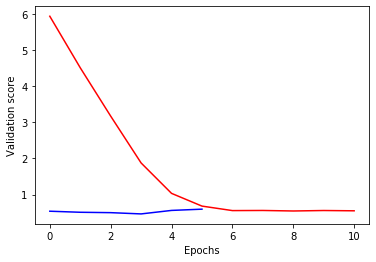

In [25]:
# Create the plot
import matplotlib.pyplot as plt
plt.plot(model_1_training.history['val_loss'], 'r',
         model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

> Note: Model_2 <font size="3" color="blue">blue</font> line in the graph has less loss ,so it is good . i.e wider networks are good


## Exercise 4: Adding layers to a network(`Deeper Network`)
- In above exercise 3, you’ve seen how to experiment with wider networks.
- In this exercise, you'll try a `Deeper Network (More Hidden Layers)`.

### Create a model (`With One Layer`)

In [28]:
# The input shape to use in the first hidden layer
input_shape = (n_fetures,)
# Create the new model: model_1
model_1 = Sequential()
# Add one hidden layer
model_1.add(Dense(50, activation='relu', input_shape=input_shape)) 
# Add the output layer
model_1.add(Dense(2, activation='softmax'))
# Compile model_1
model_1.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

### Create a model (`With Three Layers`)

In [29]:
# Create the new model: model_2
model_2 = Sequential()
# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))
# Add the output layer
model_2.add(Dense(2, activation='softmax'))
# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Fit Models

In [30]:
# Fit model 1
model_1_training = model_1.fit(X_train, y_train, 
                               epochs=20, 
                               validation_split=0.4, 
                               callbacks=[early_stopping_monitor], 
                               verbose=False)
# Fit model 2
model_2_training = model_2.fit(X_train, y_train, 
                               epochs=20, 
                               validation_split=0.4, 
                               callbacks=[early_stopping_monitor], 
                               verbose=False)

### Observe the graph

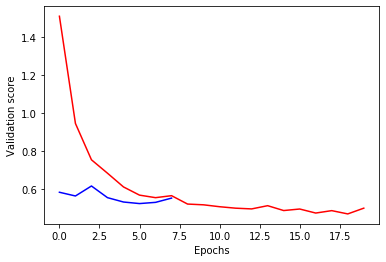

In [31]:
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', 
         model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

> Note: Model_2 <font size="3" color="blue">blue</font> line in the graph has less loss ,so it is good. That means deeper networks are good
